In [2]:
# Importing testfunctions and algorithms
import numpy as np
import matplotlib.pyplot as plt

import TestFunctionsAndBoundaries.TestFunctions as tf

from Algorithms.PSO import PSO
from Algorithms.GA import GA
from Algorithms.SA import SA
from Algorithms.TS import TS 


In [3]:
# Testing functions
print(PSO(tf.Ackley, tf.Ackley_bounds, 10))
print(GA(tf.Ackley, tf.Ackley_bounds, 10))
print(SA(tf.Ackley, tf.Ackley_bounds, 10))
print(TS(tf.Ackley, tf.Ackley_bounds, 10))

[ -2.01566077 -14.31588281 -13.85929227   8.2899374  -10.26845586
   6.91284984 -18.43239199   3.2180371   -0.83320303  -6.11103088]
[ 1.23211957e+00 -2.96518660e-02  7.27649729e+00  1.73184995e+00
 -8.73837171e-02  1.54179331e+01  2.40355604e-03  1.80166664e+00
 -6.14798328e+00  1.04217577e+01]
[ 27.50021189 -19.30673932  20.8139109   17.5516656  -12.18912193
 -16.57040784  17.62013102 -15.21351313 -32.7         26.78062043]
[ 15.173675    -6.07419545 -11.13524785   0.89656766 -12.2435085
   7.9595406    2.78425428   3.90068594  11.18918874  10.90347124]


In [4]:
benchmark_functions = [("Sphere", tf.Sphere, tf.Sphere_bounds, tf.Sphere_opt), 
                       ("Elliptic", tf.Elliptic, tf.Elliptic_bounds, tf.Elliptic_opt),
                       ("Rastrigin", tf.Rastrigin, tf.Rastrigin_bounds, tf.Rastrigin_opt),
                       ("Ackley", tf.Ackley, tf.Ackley_bounds, tf.Ackley_opt),
                       ("Schwefel_1_2", tf.Schwefel_1_2, tf.Schwefel_1_2_bounds, tf.Schwefel_1_2_opt),
                       ("Schwefel", tf.Schwefel, tf.Schwefel_bounds, tf.Schwefel_opt),
                       ("Rosenbrock", tf.Rosenbrock, tf.Rosenbrock_bounds, tf.Rosenbrock_opt),
                       ("Griewank", tf.Griewank, tf.Griewank_bounds, tf.Griewank_opt),
                       ("Sum_of_different_powers", tf.Sum_of_different_powers, tf.Sum_of_different_powers_bounds, tf.Sum_of_different_powers_opt),
                       ("Sum_squares", tf.Sum_squares, tf.Sum_squares_bounds, tf.Sum_squares_opt)]


In [5]:
# Testing benchmark functions
for name, fit_func, bounds, opt in benchmark_functions:
    print("--- " + name +  " ---")
    print("PSO results: ", fit_func(PSO(fit_func, bounds, 3, iterations = 10)))
    print("Actual Optimum: ", opt)
    print("\n")

--- Sphere ---
PSO results:  0.01080736714924161
Actual Optimum:  0


--- Elliptic ---
PSO results:  903.9003384189364
Actual Optimum:  0


--- Rastrigin ---
PSO results:  11.914619220874506
Actual Optimum:  0


--- Ackley ---
PSO results:  14.991586909480421
Actual Optimum:  0


--- Schwefel_1_2 ---
PSO results:  79.00675844399606
Actual Optimum:  0


--- Schwefel ---
PSO results:  844.9937397788208
Actual Optimum:  0


--- Rosenbrock ---
PSO results:  9.329237945231322
Actual Optimum:  0


--- Griewank ---
PSO results:  11.525119013079983
Actual Optimum:  0


--- Sum_of_different_powers ---
PSO results:  3.375784937986945e-13
Actual Optimum:  0


--- Sum_squares ---
PSO results:  0.260714577118214
Actual Optimum:  0




In [6]:
# Testing visualization data output 
its = 20

data_viz_PSO = PSO(tf.Ackley, tf.Ackley_bounds, 2, iterations = its, v_max = 10, visualize = True)
#print(data_viz_PSO, "\n")

data_viz_GA = GA(tf.Ackley, tf.Ackley_bounds, 2, iterations = its, visualize = True)
#print(data_viz_GA, "\n")

data_viz_TS = TS(tf.Ackley, tf.Ackley_bounds, 2, iterations = its, visualize = True)
#print(data_viz_TS, "\n")

data_viz_SA = SA(tf.Ackley, tf.Ackley_bounds, 2, iterations = its,  visualize = True)
#print(data_viz_SA, "\n")



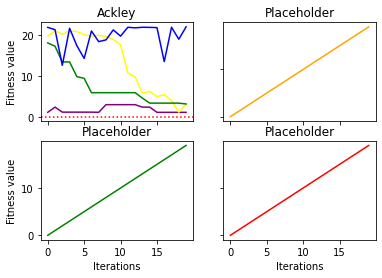

In [7]:
length = len(data_viz_PSO)
fit_values_PSO = [tf.Ackley(x) for x in data_viz_PSO]
fit_values_GA = [tf.Ackley(x) for x in data_viz_GA]
fit_values_TS = [tf.Ackley(x) for x in data_viz_TS]
fit_values_SA = [tf.Ackley(x) for x in data_viz_SA[:length]]


iterations = list(range(length))
placeholder_x = iterations
placeholder_y = iterations

fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(iterations, fit_values_PSO, color = "purple")
axs[0, 0].plot(iterations, fit_values_TS, color = "yellow")
axs[0, 0].plot(iterations, fit_values_GA, color = "green")
axs[0, 0].plot(iterations, fit_values_SA, color = "blue")
axs[0, 0].axhline(y=0.0, color='r', linestyle='dotted')
axs[0, 0].set_title('Ackley')

axs[0, 1].plot(placeholder_x, placeholder_y, color = 'orange')
axs[0, 1].set_title('Placeholder')
axs[1, 0].plot(placeholder_x, placeholder_y, color = 'green')
axs[1, 0].set_title('Placeholder')
axs[1, 1].plot(placeholder_x, placeholder_y, color = 'red')
axs[1, 1].set_title('Placeholder')

# Set labels
for ax in axs.flat:
    ax.set(xlabel='Iterations', ylabel='Fitness value')

# Hide x labels and tick labels for top plots and y ticks for right plots
for ax in axs.flat:
    ax.label_outer()